In [1]:
#importing packages and identifying/importing csv file
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, labs, geom_boxplot, geom_point, scale_x_continuous, scale_y_continuous, theme, element_text
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.formula.api import ols 
medical=pd.read_csv('medical.csv')

In [2]:
# profiling dataframe. Looks like there are no null values
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
medical.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Begin identifying duplicates section

In [4]:
# identifying any duplicates
medical.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
# seeing full value count of duplicates: no duplicates in file
print(medical.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [6]:
# looking into missing data
medical.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

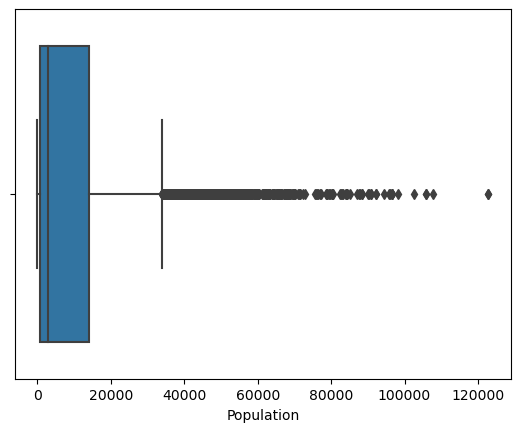

In [9]:
# look at boxplot of Population variable to identify outliers
boxplot=sns.boxplot(x='Population',data=medical)
# Outliers will be retained due to the large number of outliers and the expected diversity

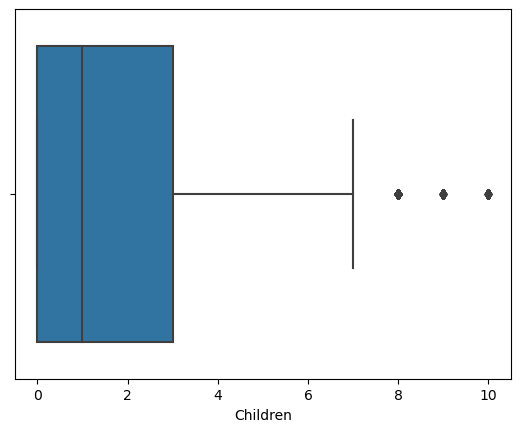

In [10]:
# look at boxplot of Children variable to identify outliers
boxplot=sns.boxplot(x='Children',data=medical) 
# outliers will be retained because these values are expected diversity

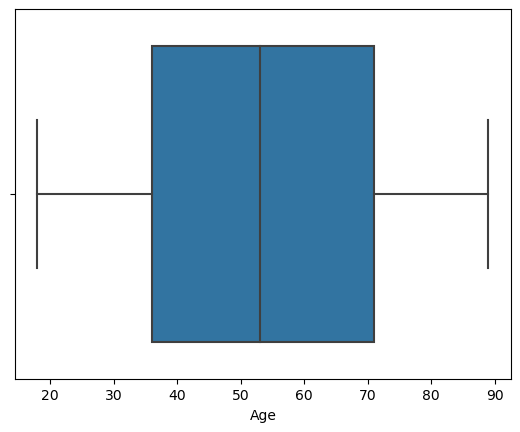

In [11]:
# look at boxplot of Age variable to identify outliers
boxplot=sns.boxplot(x='Age',data=medical) 
# no outliers

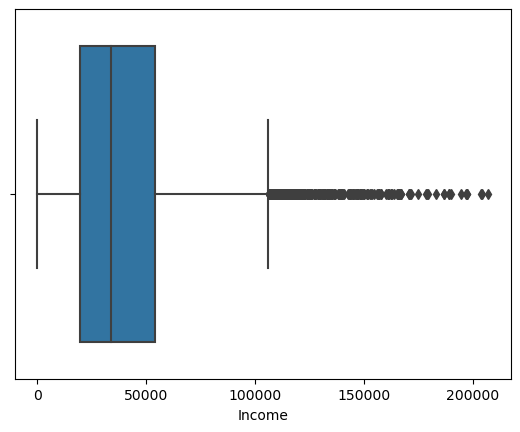

In [12]:
# look at boxplot of Income variable to identify outliers
boxplot=sns.boxplot(x='Income',data=medical) 
# Outliers will be retained because they add expected diversity

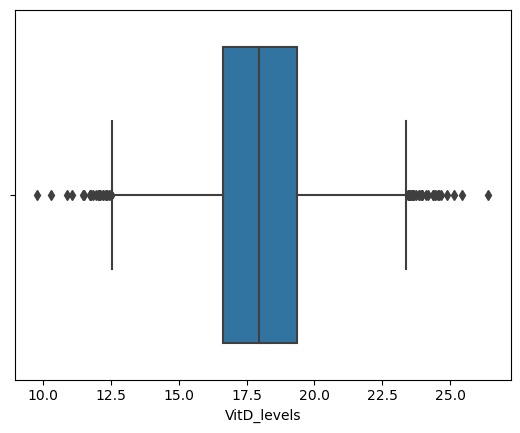

In [13]:
# look at boxplot of vit D levels variable to identify outliers
boxplot=sns.boxplot(x='VitD_levels',data=medical) 
# Outliers will be retained

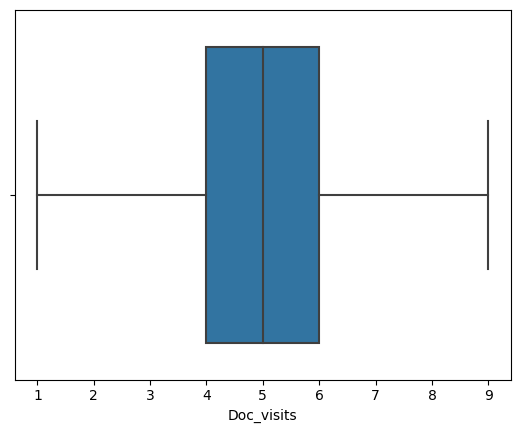

In [14]:
# look at boxplot of doc visits variable
boxplot=sns.boxplot(x='Doc_visits',data=medical) 
# no outliers

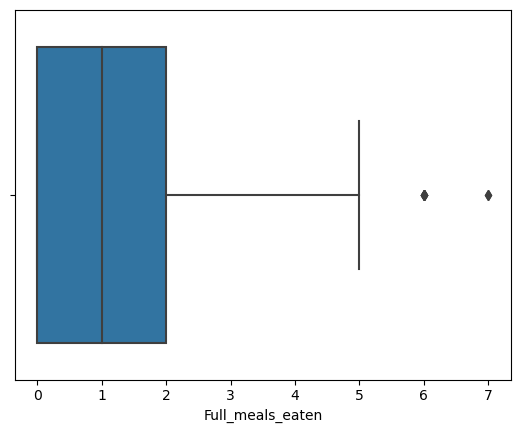

In [15]:
# look at boxplot of full meals eaten variable
boxplot=sns.boxplot(x='Full_meals_eaten',data=medical) 
# Outliers will be retained

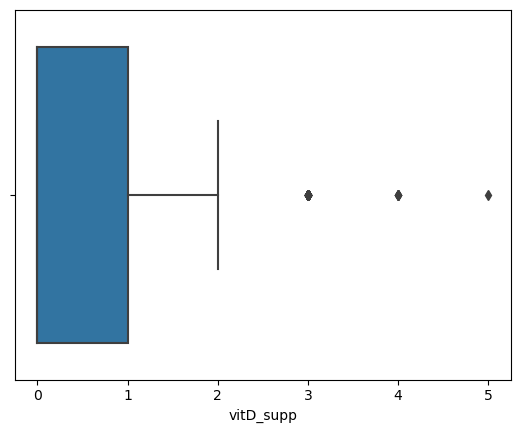

In [16]:
# look at boxplot of vit D supplement variable
boxplot=sns.boxplot(x='vitD_supp',data=medical)
# Outliers will be retained

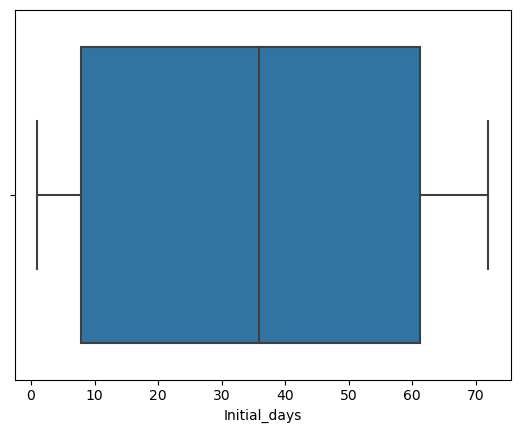

In [17]:
# look at boxplot of initial days variable
boxplot=sns.boxplot(x='Initial_days',data=medical)
# no outliers

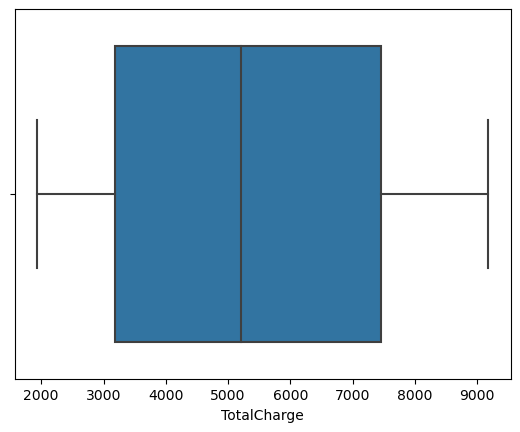

In [18]:
# look at boxplot of TotalCharge variable
boxplot=sns.boxplot(x='TotalCharge',data=medical)
# no outliers

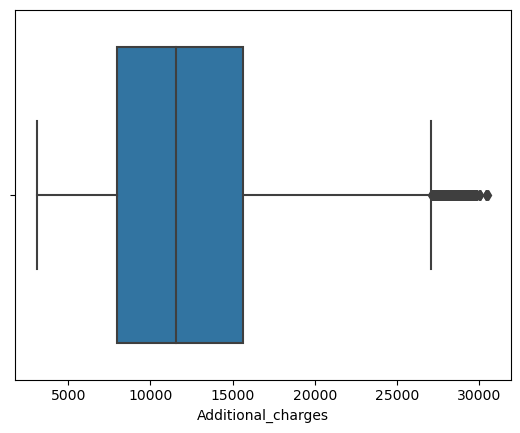

In [19]:
# look at boxplot of Additional_charges variable
boxplot=sns.boxplot(x='Additional_charges',data=medical)
# Outliers will be retained for expected diversity

In [20]:
medical.Soft_drink.value_counts()

Soft_drink
No     7425
Yes    2575
Name: count, dtype: int64

In [21]:
# recode soft drink into numeric
medical['Soft_drink_numeric']=medical['Soft_drink'].replace({"Yes": 1, "No": 0})
medical.Soft_drink_numeric.value_counts()

Soft_drink_numeric
0    7425
1    2575
Name: count, dtype: int64

In [22]:
medical.Diabetes.value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [23]:
# recode Diabetes into numeric
medical['Diabetes_numeric']=medical['Diabetes'].replace({"Yes": 1, "No": 0})
medical.Diabetes_numeric.value_counts()

Diabetes_numeric
0    7262
1    2738
Name: count, dtype: int64

In [24]:
medical.Stroke.value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [25]:
# recode stroke into numeric
medical['Stroke_numeric']=medical['Stroke'].replace({"Yes": 1, "No": 0})
medical.Stroke_numeric.value_counts()

Stroke_numeric
0    8007
1    1993
Name: count, dtype: int64

In [26]:
medical.Complication_risk.value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [27]:
# recode complication risk into numeric
medical['Complication_risk_numeric']=medical['Complication_risk'].replace({"Low": 0, "Medium": 1, "High": 2})
medical.Complication_risk_numeric.value_counts()

Complication_risk_numeric
1    4517
2    3358
0    2125
Name: count, dtype: int64

In [28]:
medical.Overweight.value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [29]:
# recode overweight into numeric
medical['Overweight_numeric']=medical['Overweight'].replace({"Yes": 1, "No": 0})
medical.Overweight_numeric.value_counts()

Overweight_numeric
1    7094
0    2906
Name: count, dtype: int64

In [30]:
medical.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [31]:
# one hot encode initial admin (emergency)
medical['Emergency_numeric']=medical['Initial_admin'].replace({"Emergency Admission": 1, "Elective Admission": 0, 
                                                       "Observation Admission": 0})
medical.Emergency_numeric.value_counts()

Emergency_numeric
1    5060
0    4940
Name: count, dtype: int64

In [32]:
# one hot encode initial admin (elective)
medical['Elective_numeric']=medical['Initial_admin'].replace({"Emergency Admission": 0, "Elective Admission": 1, 
                                                       "Observation Admission": 0})
medical.Elective_numeric.value_counts()

Elective_numeric
0    7496
1    2504
Name: count, dtype: int64

In [33]:
# one hot encode services (intravenous)
medical['Intravenous_numeric']=medical['Services'].replace({"Intravenous": 1, "Blood Work": 0, 
                                                       "CT Scan": 0, "MRI": 0})
medical.Intravenous_numeric.value_counts()

Intravenous_numeric
0    6870
1    3130
Name: count, dtype: int64

In [34]:
medical.Services.value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [35]:
# one hot encode services (CT Scan)
medical['CTScan_numeric']=medical['Services'].replace({"Intravenous": 0, "Blood Work": 0, 
                                                       "CT Scan": 1, "MRI": 0})
medical.CTScan_numeric.value_counts()

CTScan_numeric
0    8775
1    1225
Name: count, dtype: int64

In [36]:
# one hot encode services (MRI)
medical['MRI_numeric']=medical['Services'].replace({"Intravenous": 0, "Blood Work": 0, 
                                                       "CT Scan": 0, "MRI": 1})
medical.MRI_numeric.value_counts()

MRI_numeric
0    9620
1     380
Name: count, dtype: int64

In [37]:
medical.TotalCharge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [38]:
medical.Children.describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

In [39]:
medical.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [40]:
medical.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

In [41]:
medical.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [42]:
medical.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

Begin univariate visualization section

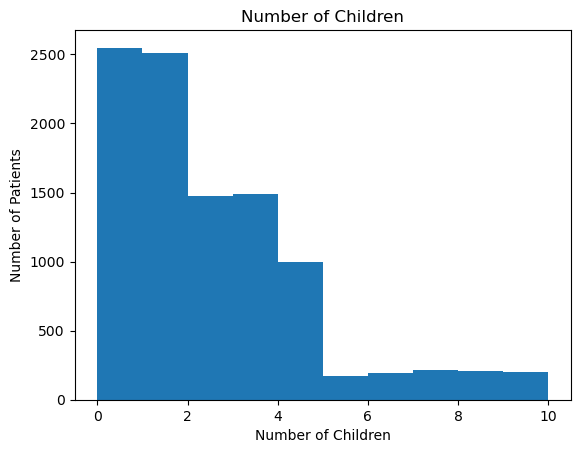

In [43]:
plt.hist(medical['Children'])
plt.title('Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Patients')
plt.show()

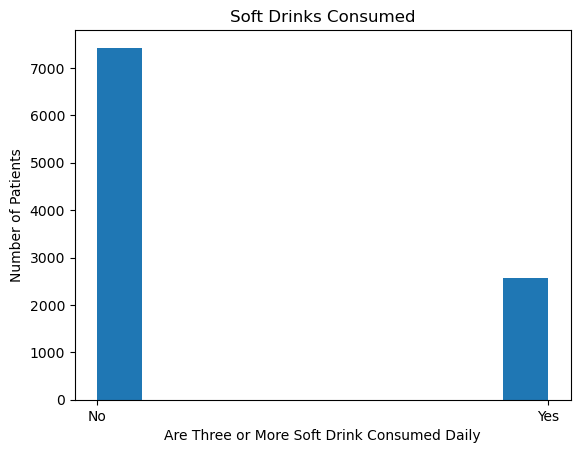

In [44]:
plt.hist(medical['Soft_drink'])
plt.title('Soft Drinks Consumed')
plt.xlabel('Are Three or More Soft Drink Consumed Daily')
plt.ylabel('Number of Patients')
plt.show()

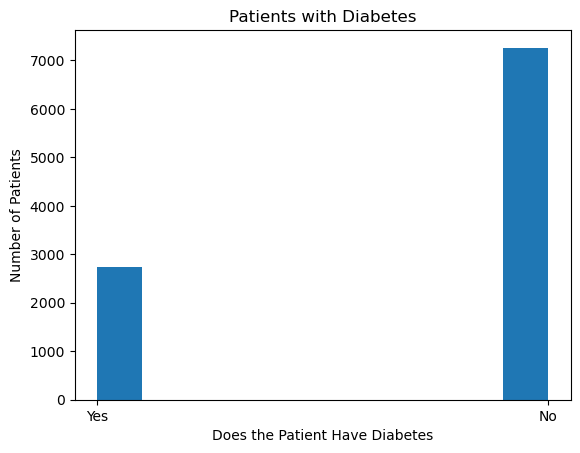

In [45]:
plt.hist(medical['Diabetes'])
plt.title('Patients with Diabetes')
plt.xlabel('Does the Patient Have Diabetes')
plt.ylabel('Number of Patients')
plt.show()

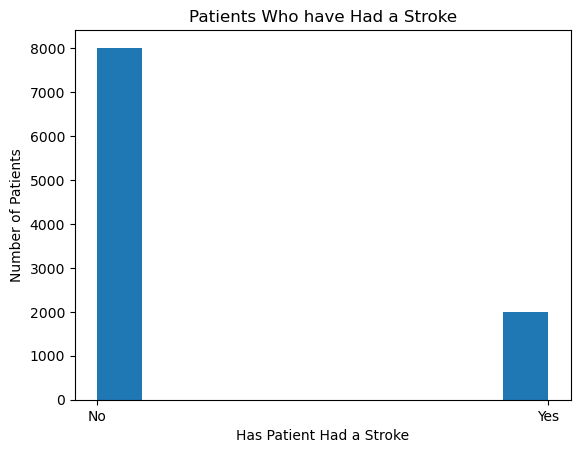

In [46]:
plt.hist(medical['Stroke'])
plt.title('Patients Who have Had a Stroke')
plt.xlabel('Has Patient Had a Stroke')
plt.ylabel('Number of Patients')
plt.show()

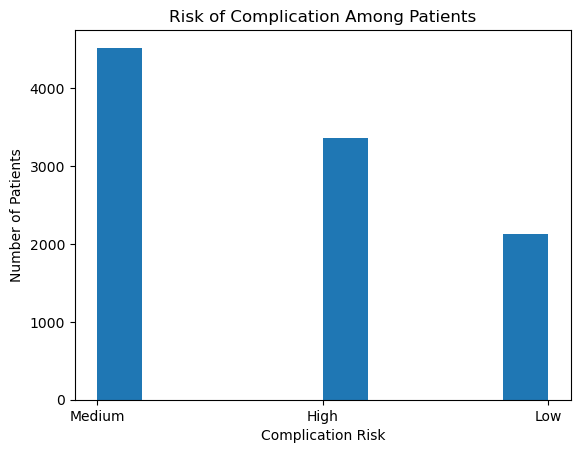

In [47]:
plt.hist(medical['Complication_risk'])
plt.title('Risk of Complication Among Patients')
plt.xlabel('Complication Risk')
plt.ylabel('Number of Patients')
plt.show()

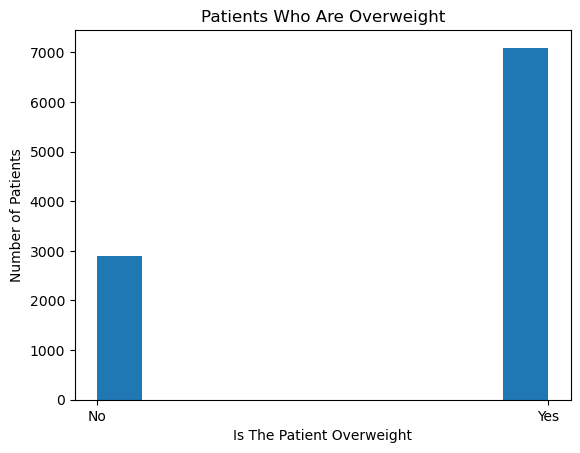

In [48]:
plt.hist(medical['Overweight'])
plt.title('Patients Who Are Overweight')
plt.xlabel('Is The Patient Overweight')
plt.ylabel('Number of Patients')
plt.show()

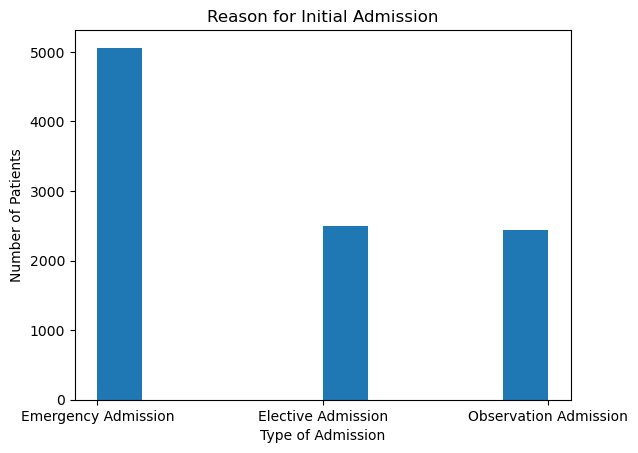

In [49]:
plt.hist(medical['Initial_admin'])
plt.title('Reason for Initial Admission')
plt.xlabel('Type of Admission')
plt.ylabel('Number of Patients')
plt.show()

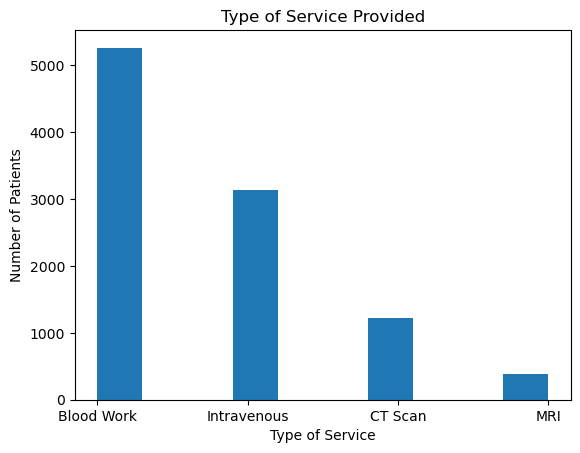

In [50]:
plt.hist(medical['Services'])
plt.title('Type of Service Provided')
plt.xlabel('Type of Service')
plt.ylabel('Number of Patients')
plt.show()

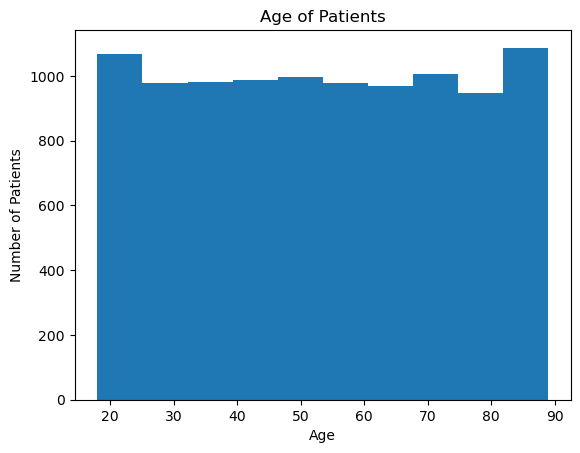

In [51]:
plt.hist(medical['Age'])
plt.title('Age of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

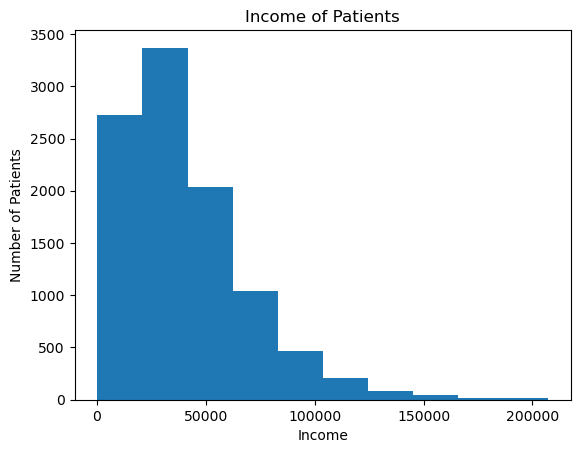

In [52]:
plt.hist(medical['Income'])
plt.title('Income of Patients')
plt.xlabel('Income')
plt.ylabel('Number of Patients')
plt.show()

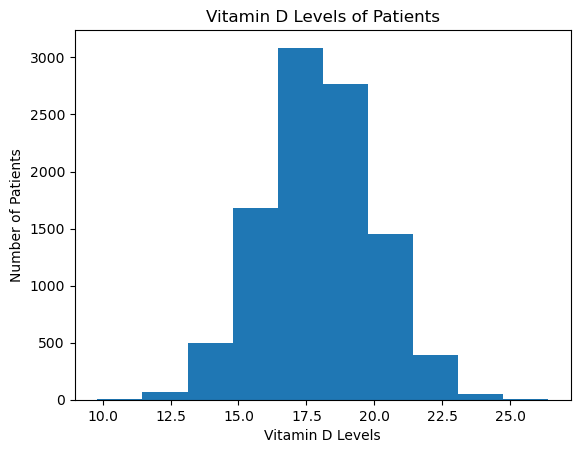

In [53]:
plt.hist(medical['VitD_levels'])
plt.title('Vitamin D Levels of Patients')
plt.xlabel('Vitamin D Levels')
plt.ylabel('Number of Patients')
plt.show()

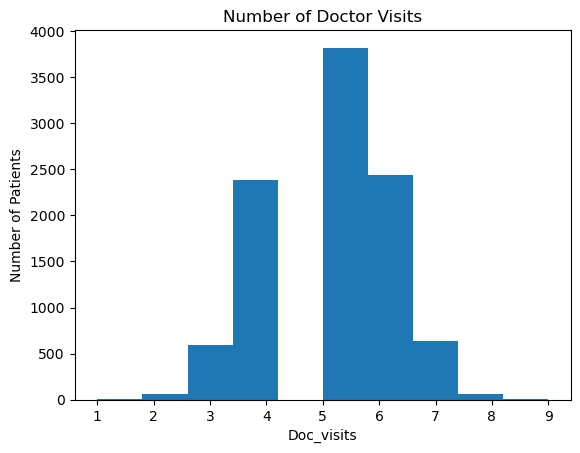

In [54]:
plt.hist(medical['Doc_visits'])
plt.title('Number of Doctor Visits')
plt.xlabel('Doc_visits')
plt.ylabel('Number of Patients')
plt.show()

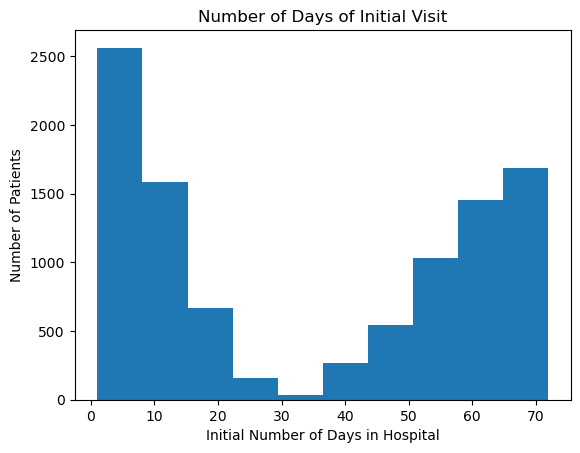

In [55]:
plt.hist(medical['Initial_days'])
plt.title('Number of Days of Initial Visit')
plt.xlabel('Initial Number of Days in Hospital')
plt.ylabel('Number of Patients')
plt.show()

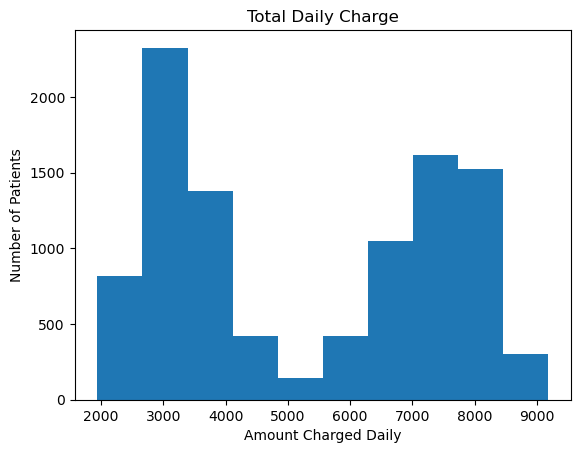

In [56]:
plt.hist(medical['TotalCharge'])
plt.title('Total Daily Charge')
plt.xlabel('Amount Charged Daily')
plt.ylabel('Number of Patients')
plt.show()

Begin bivariate visualization section

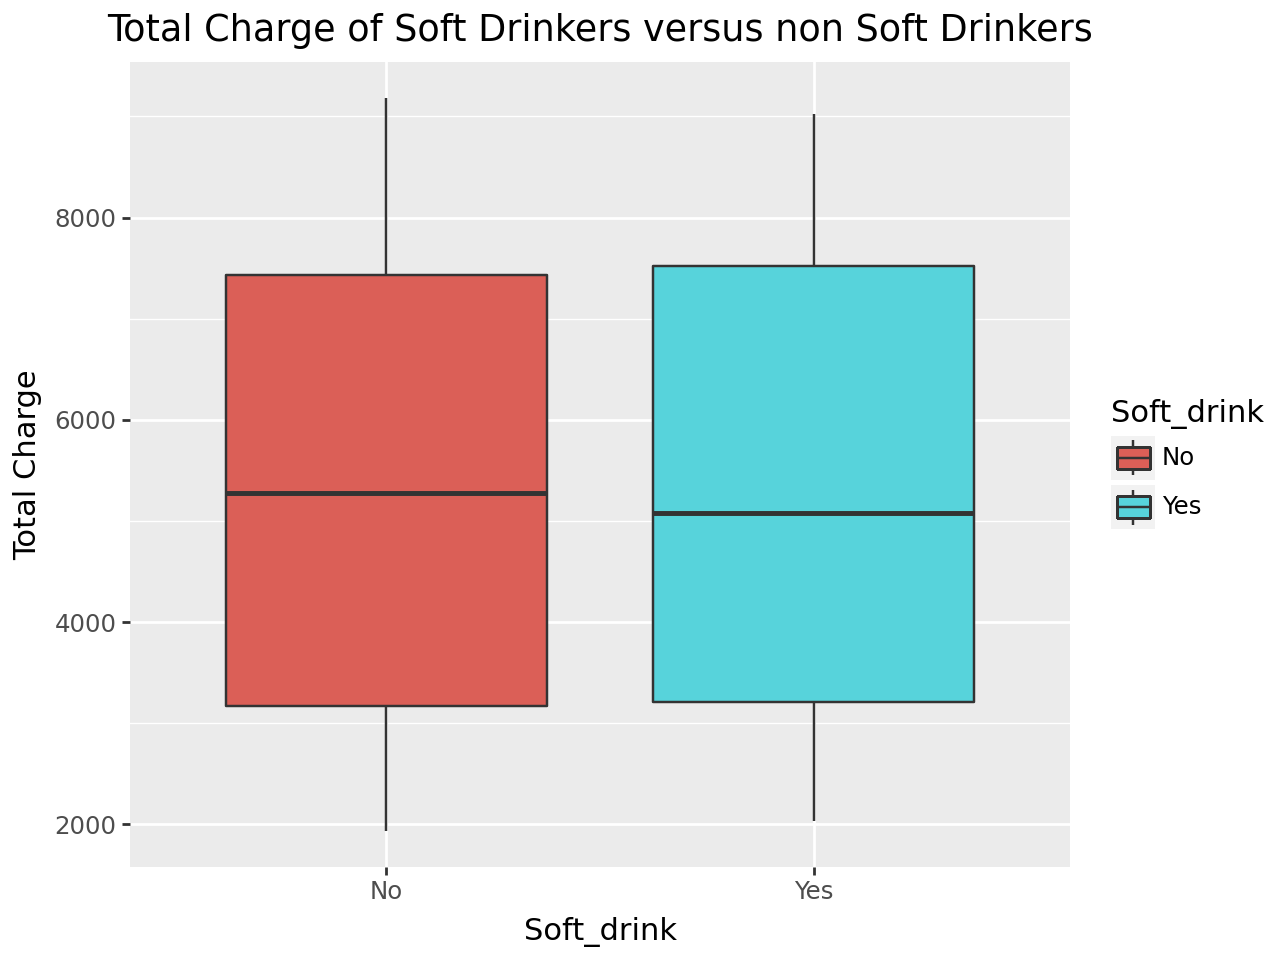

In [57]:
# soft drink and total charge
plot=(ggplot(medical) 
      + aes(x="Soft_drink", y="TotalCharge", fill="Soft_drink") 
      + labs(title="Total Charge of Soft Drinkers versus non Soft Drinkers", x="Soft_drink", y="Total Charge") 
      + geom_boxplot())
plot.show()

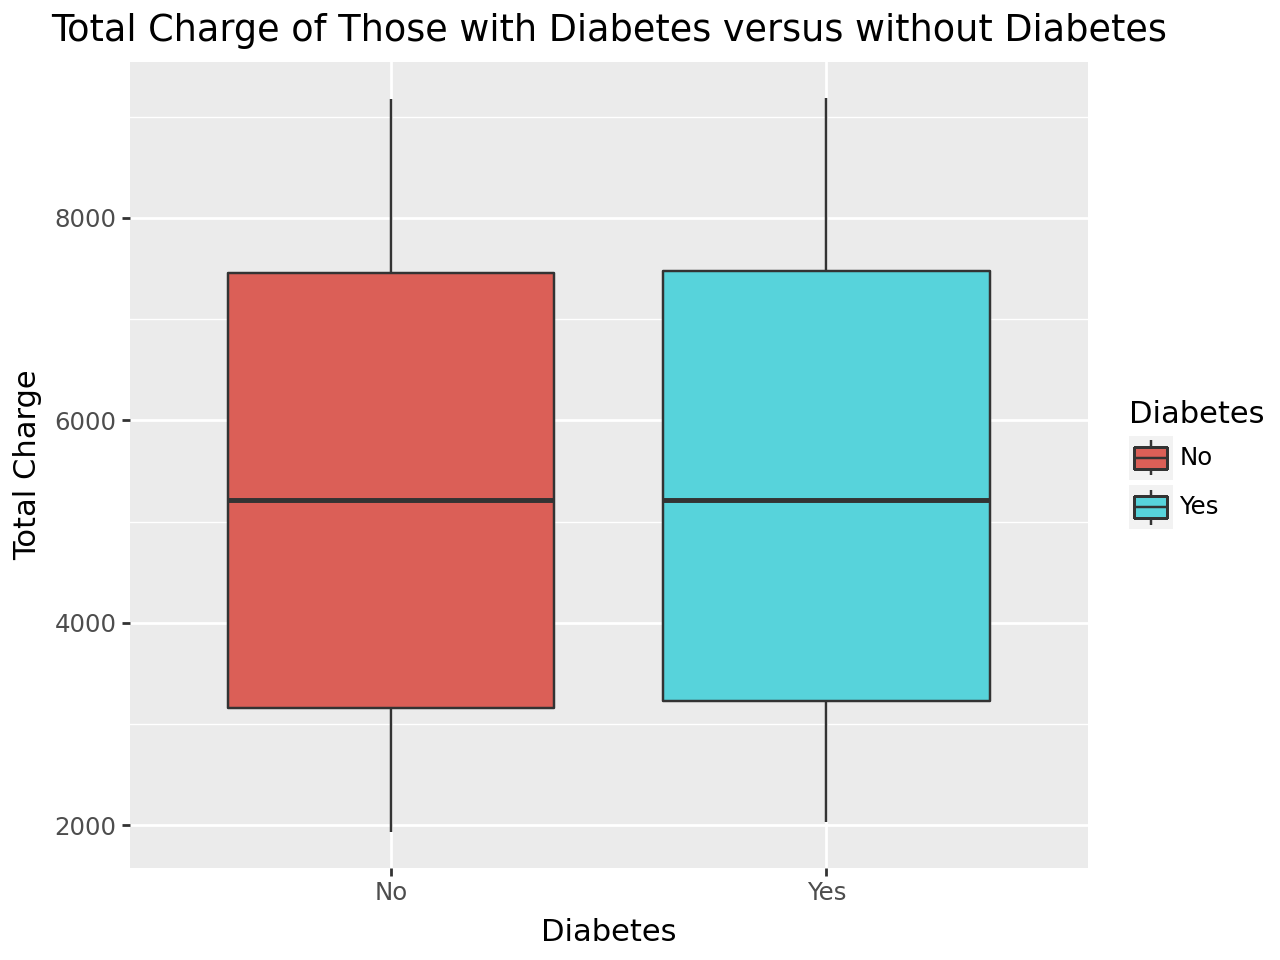

In [58]:
# diabetes and total charge
plot=(ggplot(medical) 
      + aes(x="Diabetes", y="TotalCharge", fill="Diabetes") 
      + labs(title="Total Charge of Those with Diabetes versus without Diabetes", x="Diabetes", y="Total Charge") 
      + geom_boxplot())
plot.show()

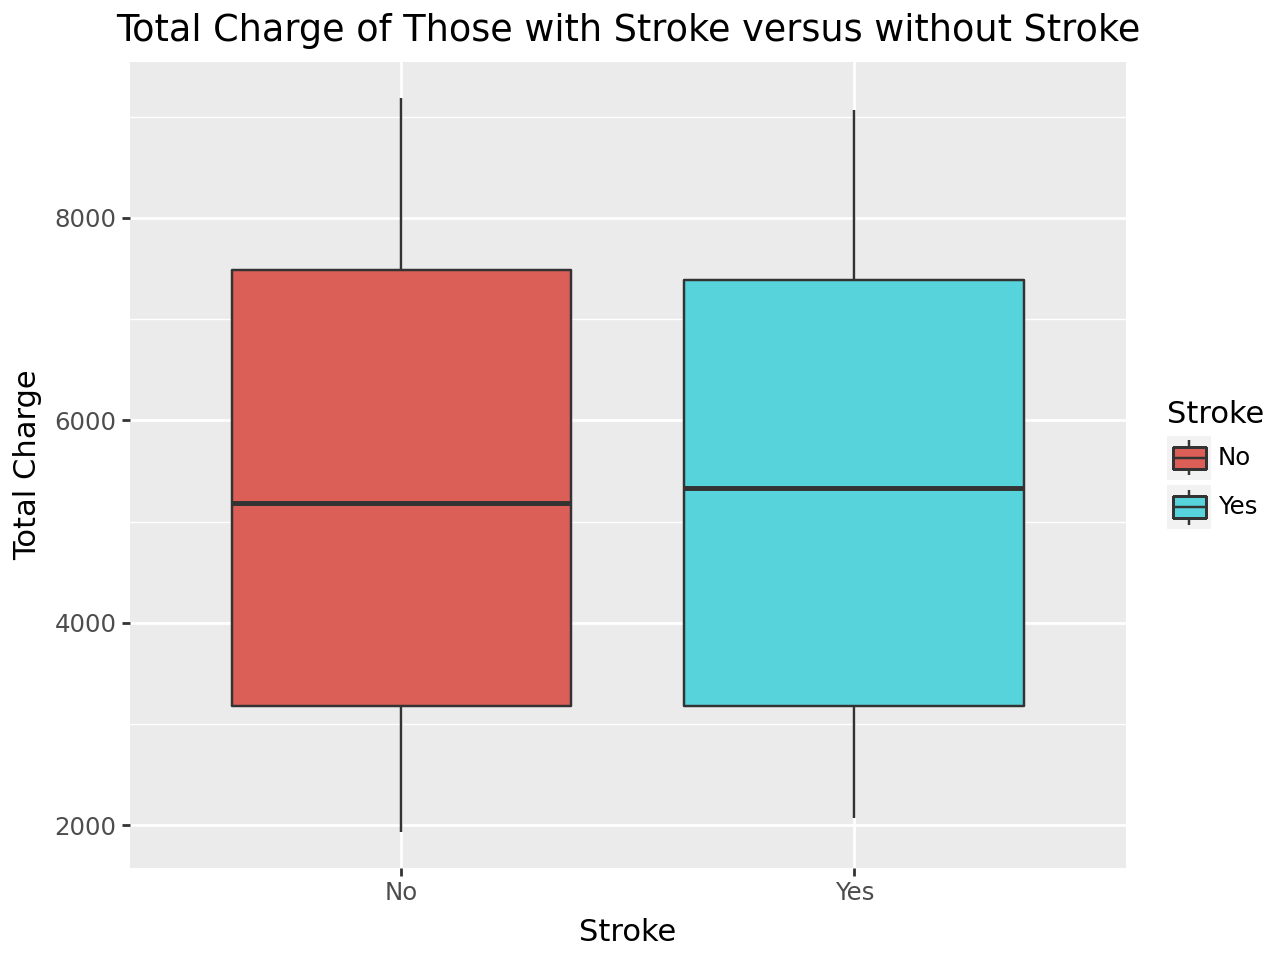

In [59]:
# stroke and total charge
plot=(ggplot(medical) 
      + aes(x="Stroke", y="TotalCharge", fill="Stroke") 
      + labs(title="Total Charge of Those with Stroke versus without Stroke", x="Stroke", y="Total Charge") 
      + geom_boxplot())
plot.show()

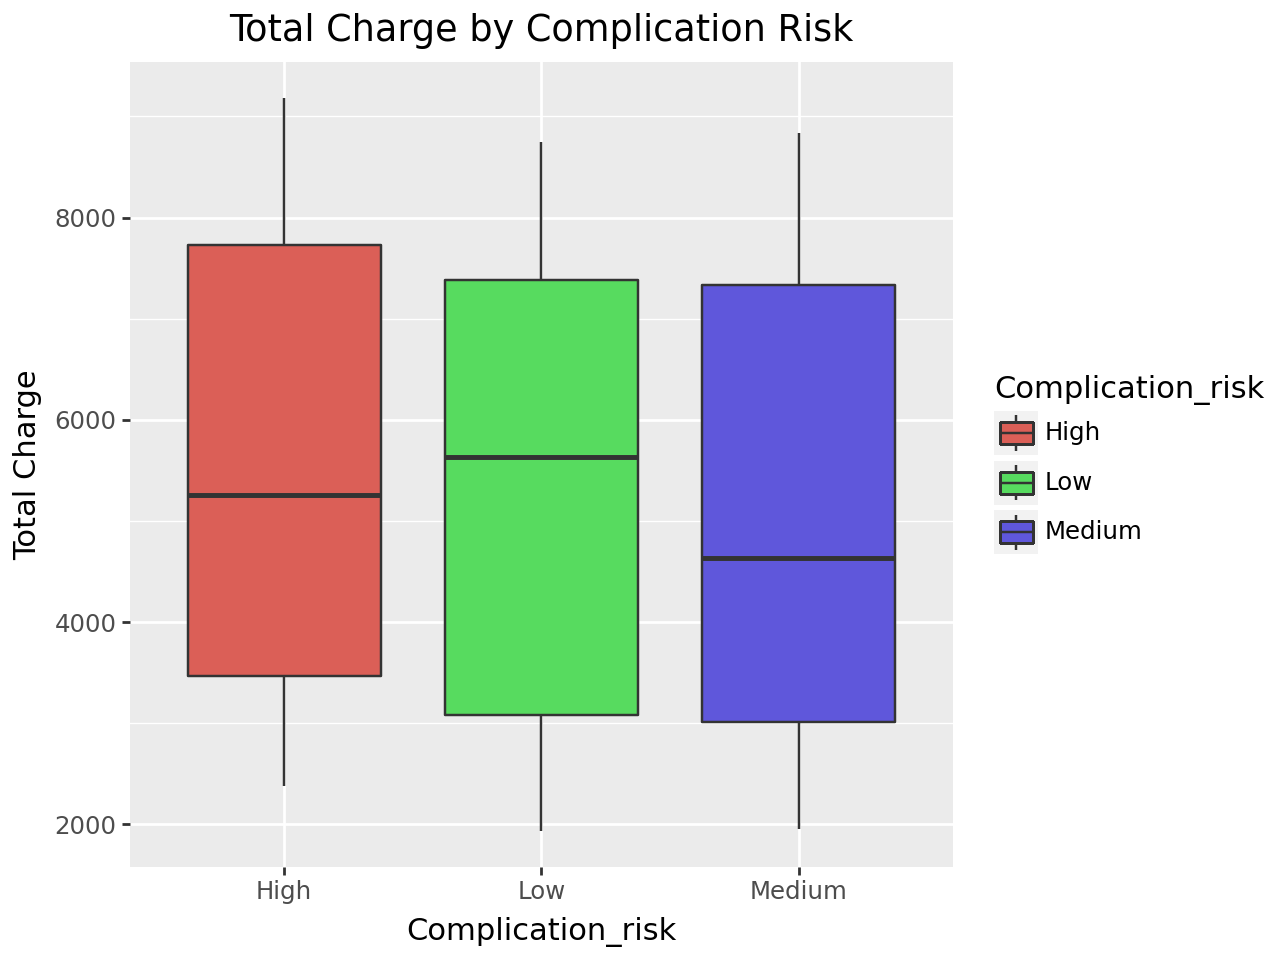

In [60]:
# complication risk and total charge
plot=(ggplot(medical) 
      + aes(x="Complication_risk", y="TotalCharge", fill="Complication_risk") 
      + labs(title="Total Charge by Complication Risk", x="Complication_risk", y="Total Charge") 
      + geom_boxplot())
plot.show()

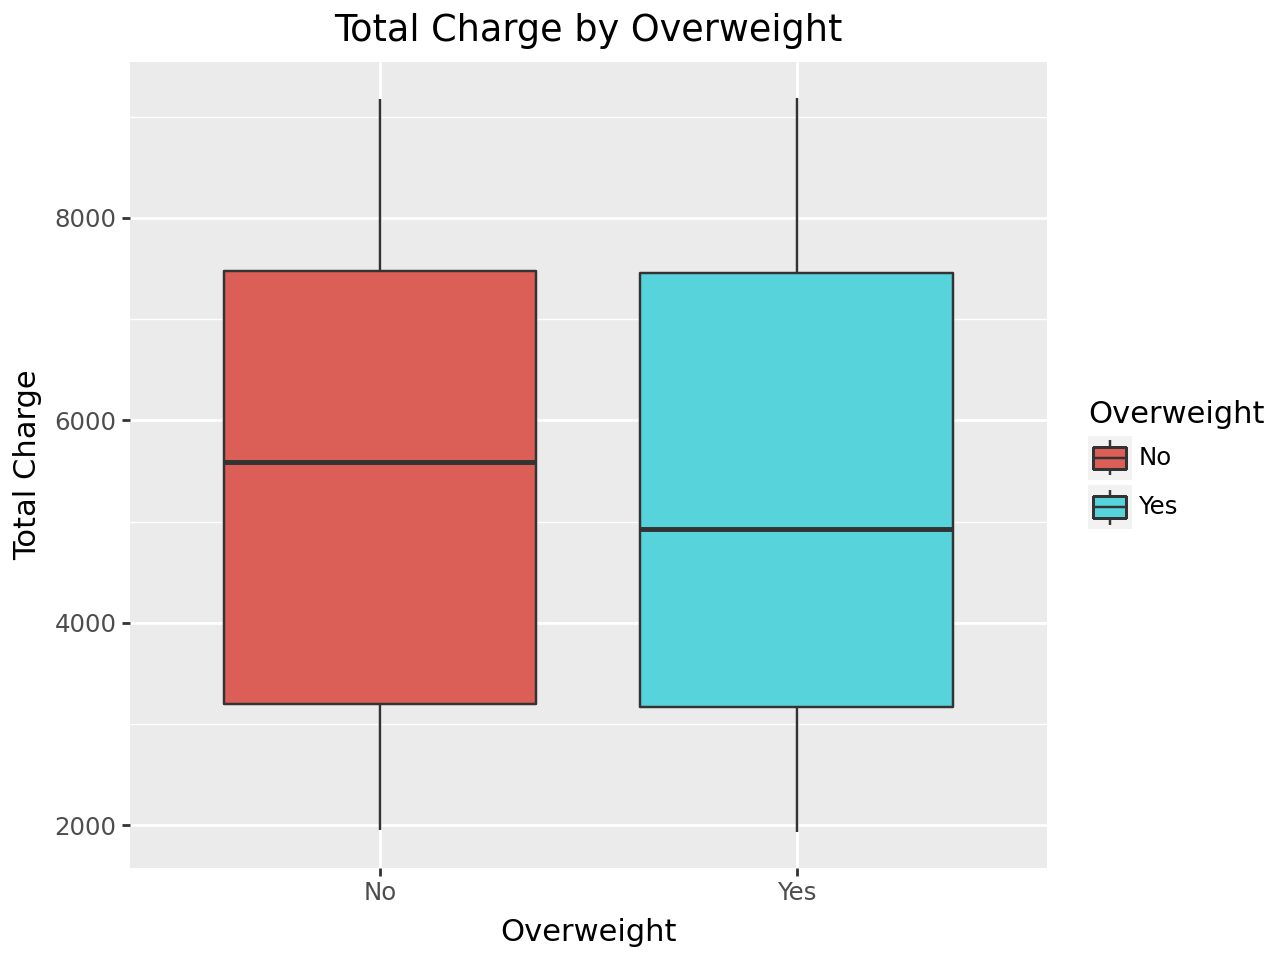

In [61]:
# overweight and total charge
plot=(ggplot(medical) 
      + aes(x="Overweight", y="TotalCharge", fill="Overweight") 
      + labs(title="Total Charge by Overweight", x="Overweight", y="Total Charge") 
      + geom_boxplot())
plot.show()

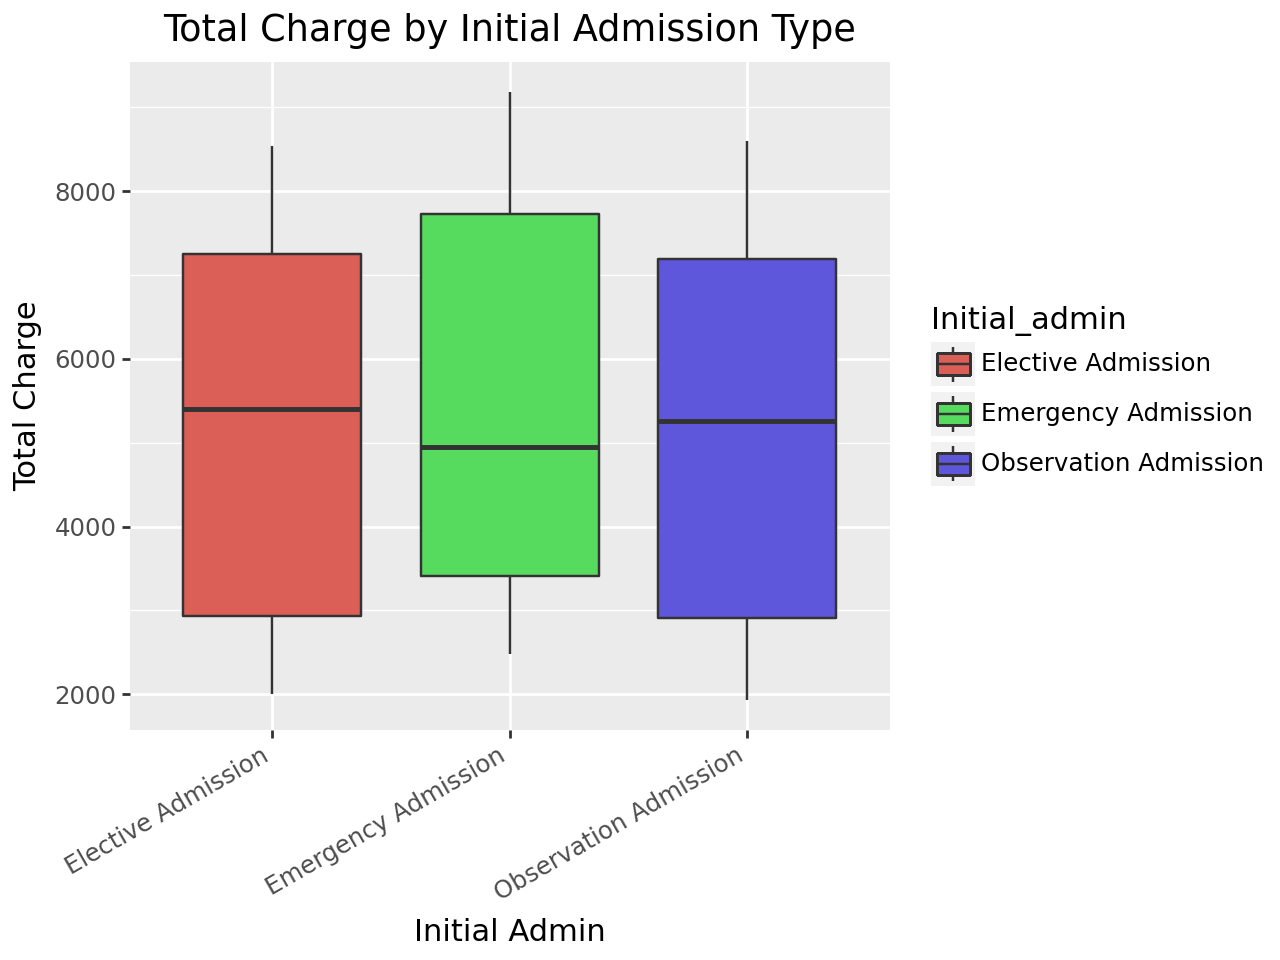

In [62]:
# initial admin and total charge
plot=(ggplot(medical) 
      + aes(x="Initial_admin", y="TotalCharge", fill="Initial_admin") 
      + labs(title="Total Charge by Initial Admission Type", x="Initial Admin", y="Total Charge") 
      + geom_boxplot()
      + theme(axis_text_x  = element_text(angle = 30, hjust = 1)))
plot.show()

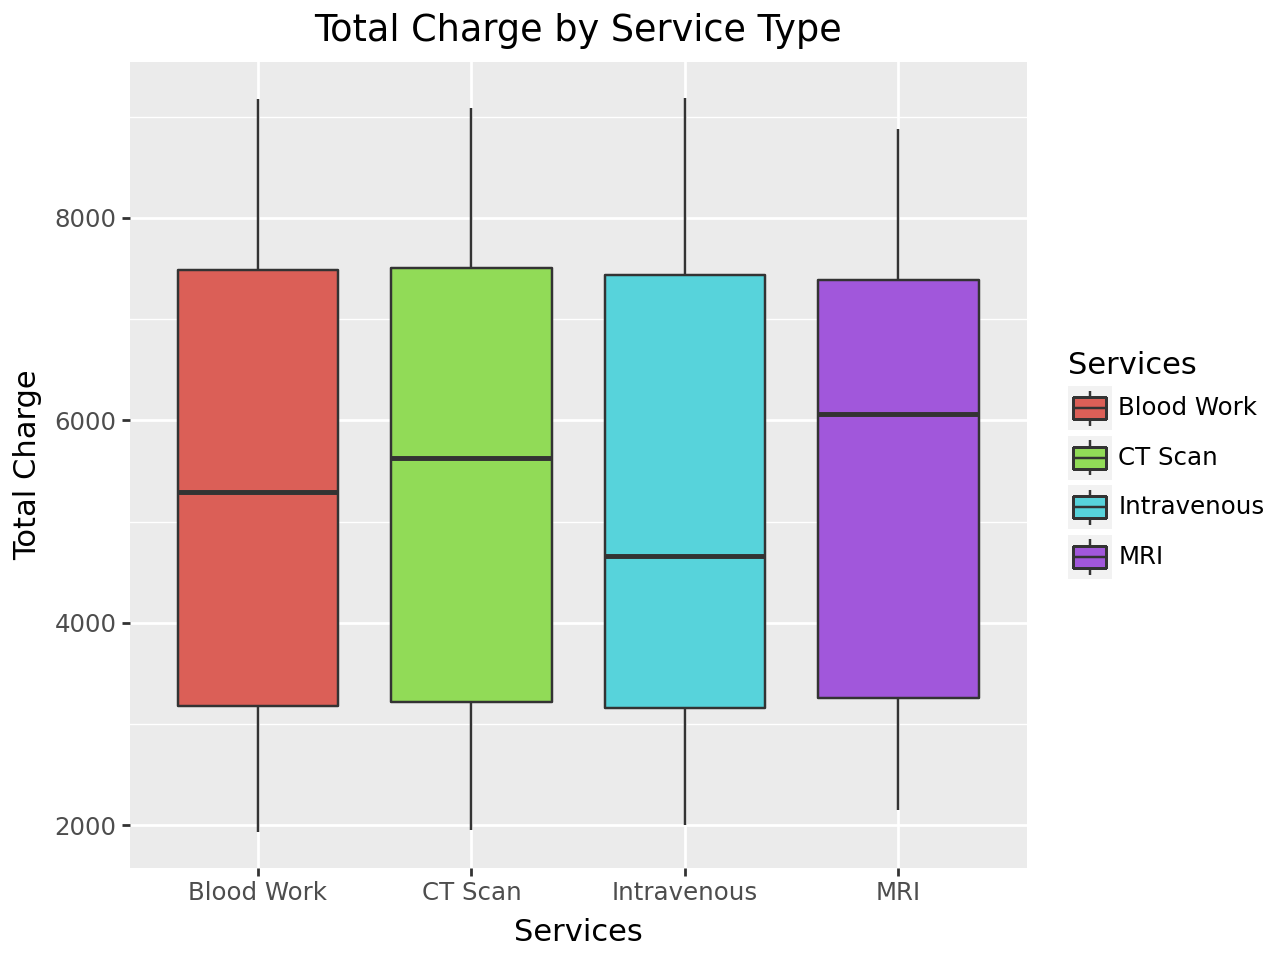

In [63]:
# services and total charge
plot=(ggplot(medical) 
      + aes(x="Services", y="TotalCharge", fill="Services") 
      + labs(title="Total Charge by Service Type", x="Services", y="Total Charge") 
      + geom_boxplot())
plot.show()

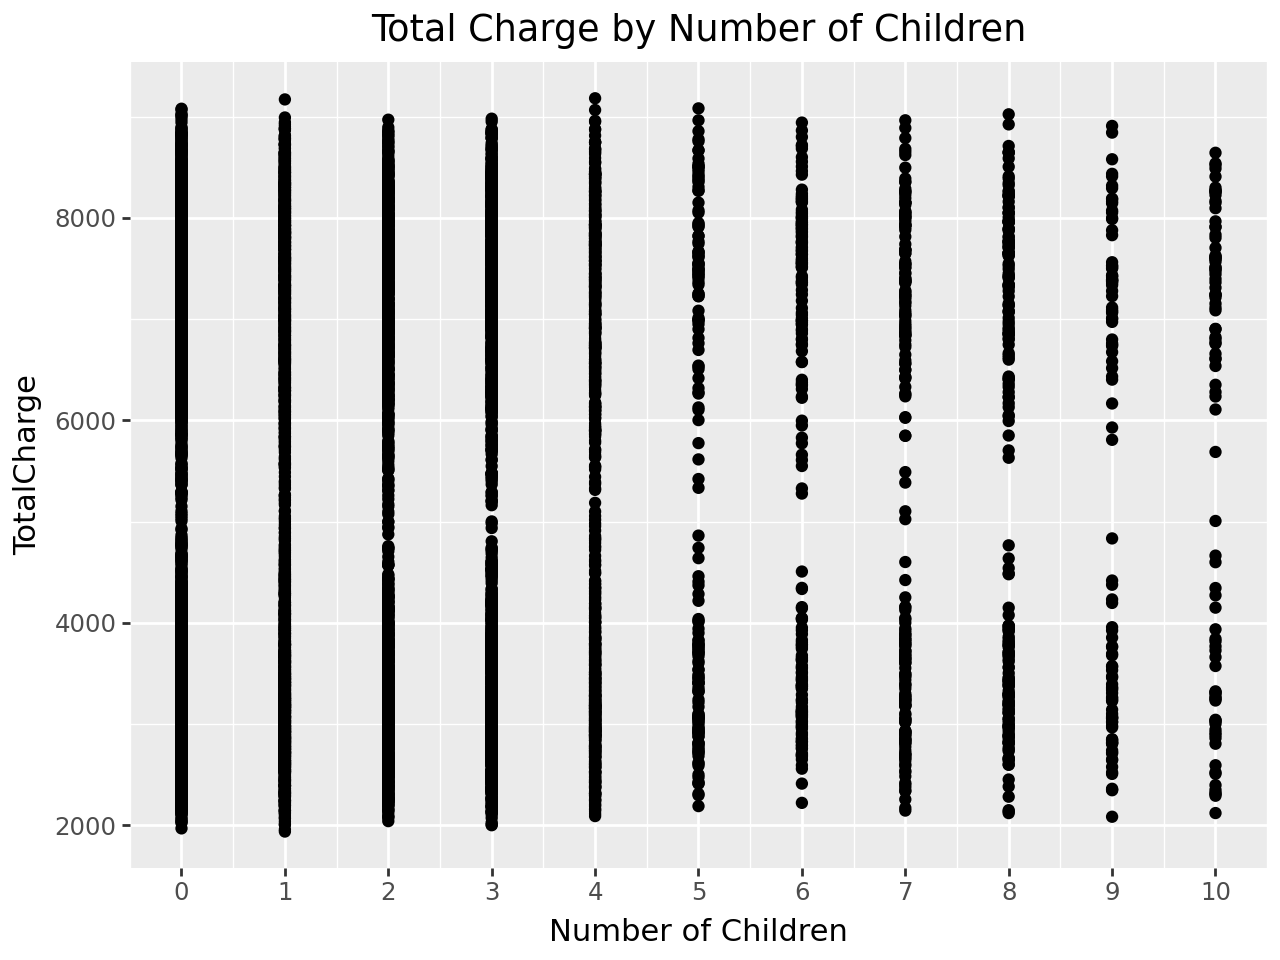

In [64]:
# children and total charge
plot=(ggplot(medical) 
      + aes(x="Children", y="TotalCharge") 
      + labs(title="Total Charge by Number of Children", x="Number of Children", y="TotalCharge") 
      + geom_point()
      + scale_x_continuous(breaks=range(0,11,1)))
plot.show()

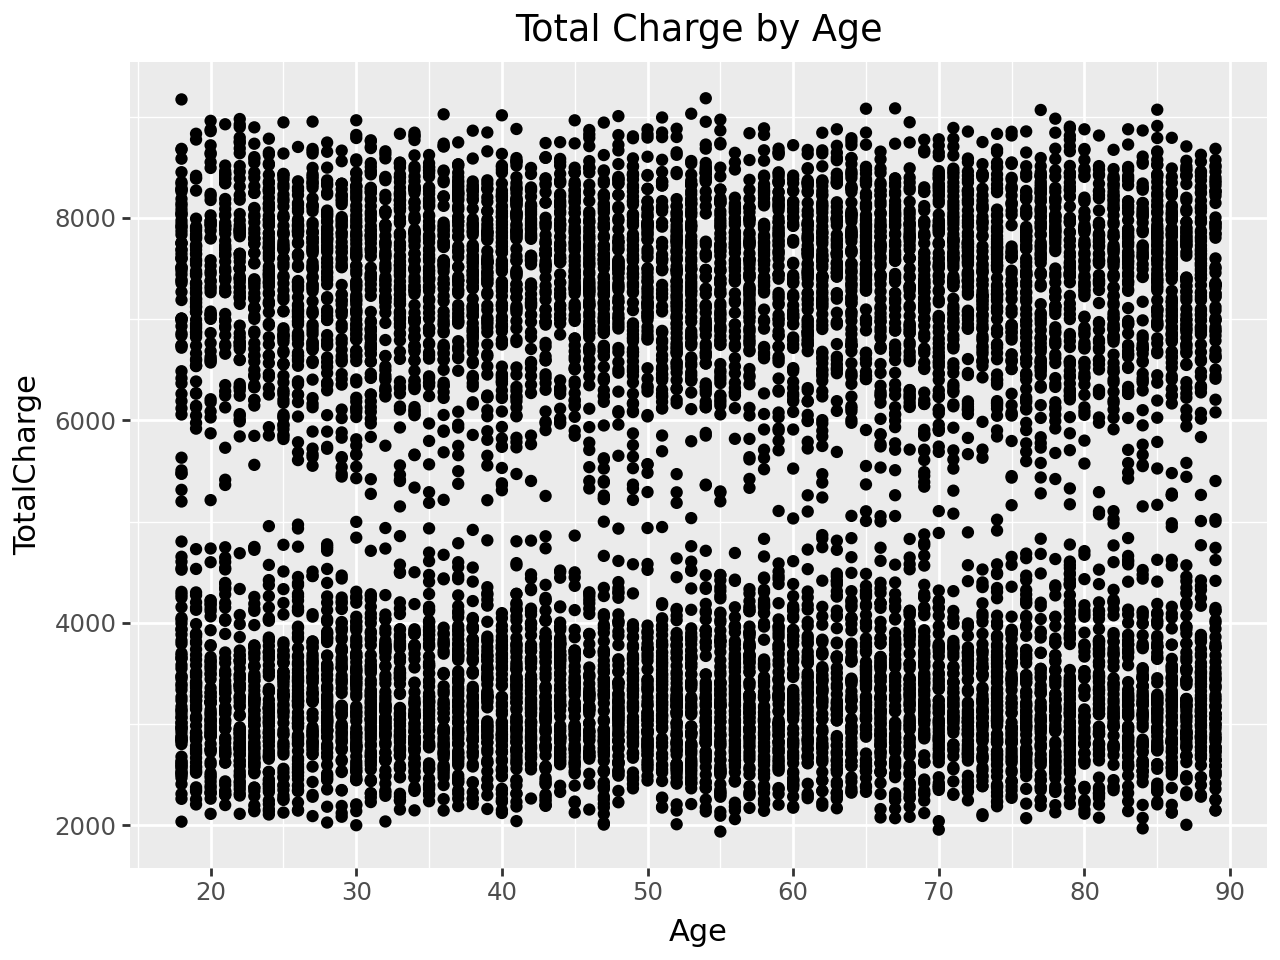

In [65]:
# children and total charge
plot=(ggplot(medical) 
      + aes(x="Age", y="TotalCharge") 
      + labs(title="Total Charge by Age", x="Age", y="TotalCharge") 
      + geom_point()
      + scale_x_continuous(breaks=range(0,100,10)))
plot.show()

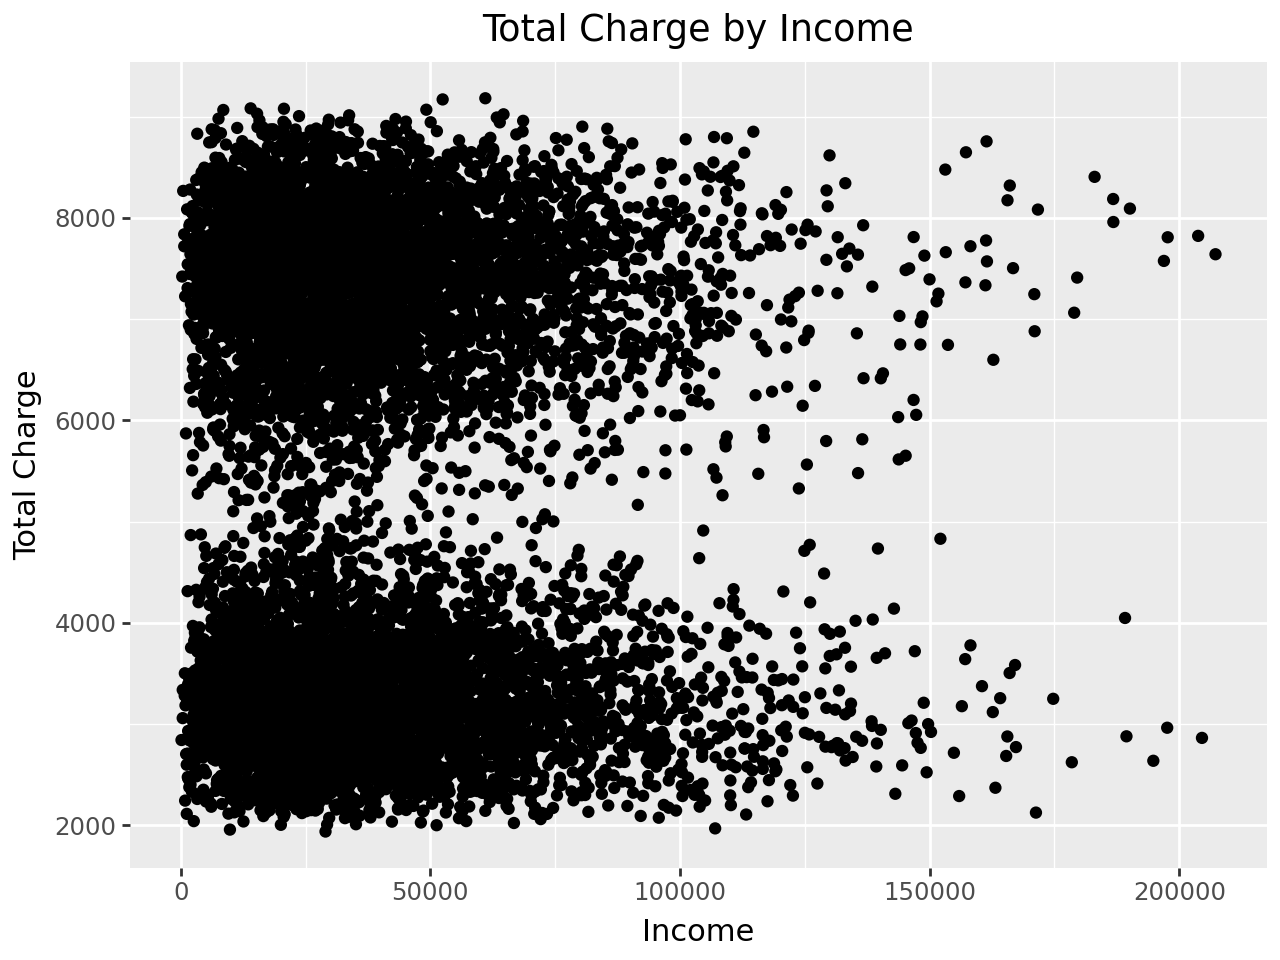

In [66]:
# income and total charge
plot=(ggplot(medical) 
      + aes(x="Income", y="TotalCharge") 
      + labs(title="Total Charge by Income", x="Income", y="Total Charge") 
      + geom_point())
plot.show()

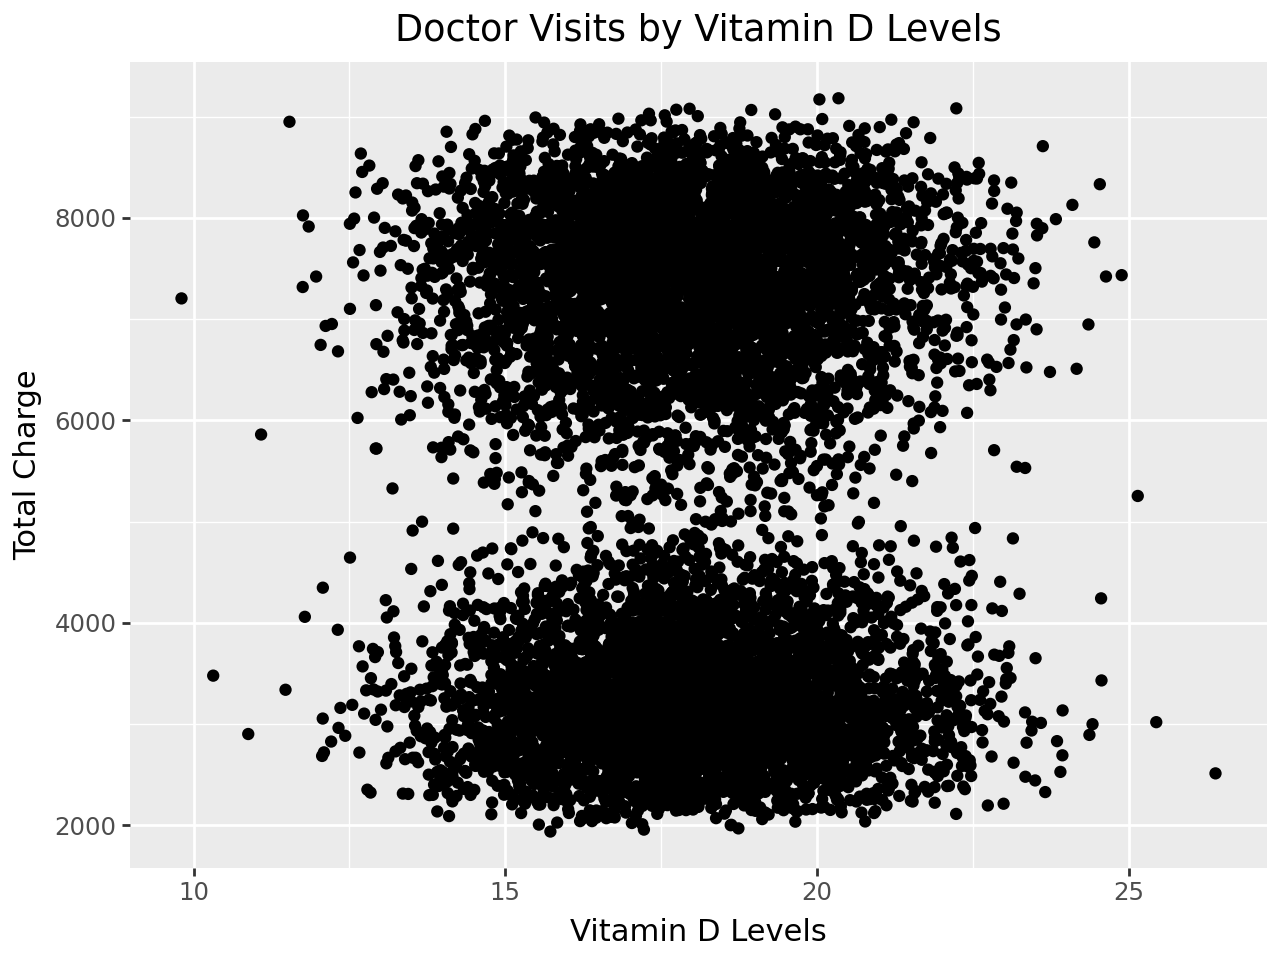

In [67]:
# TotalCharge and doc_visits
plot=(ggplot(medical) 
      + aes(x="VitD_levels", y="TotalCharge") 
      + labs(title="Doctor Visits by Vitamin D Levels", x="Vitamin D Levels", y="Total Charge") 
      + geom_point()
      + scale_x_continuous(breaks=range(0,30,5)))
plot.show()

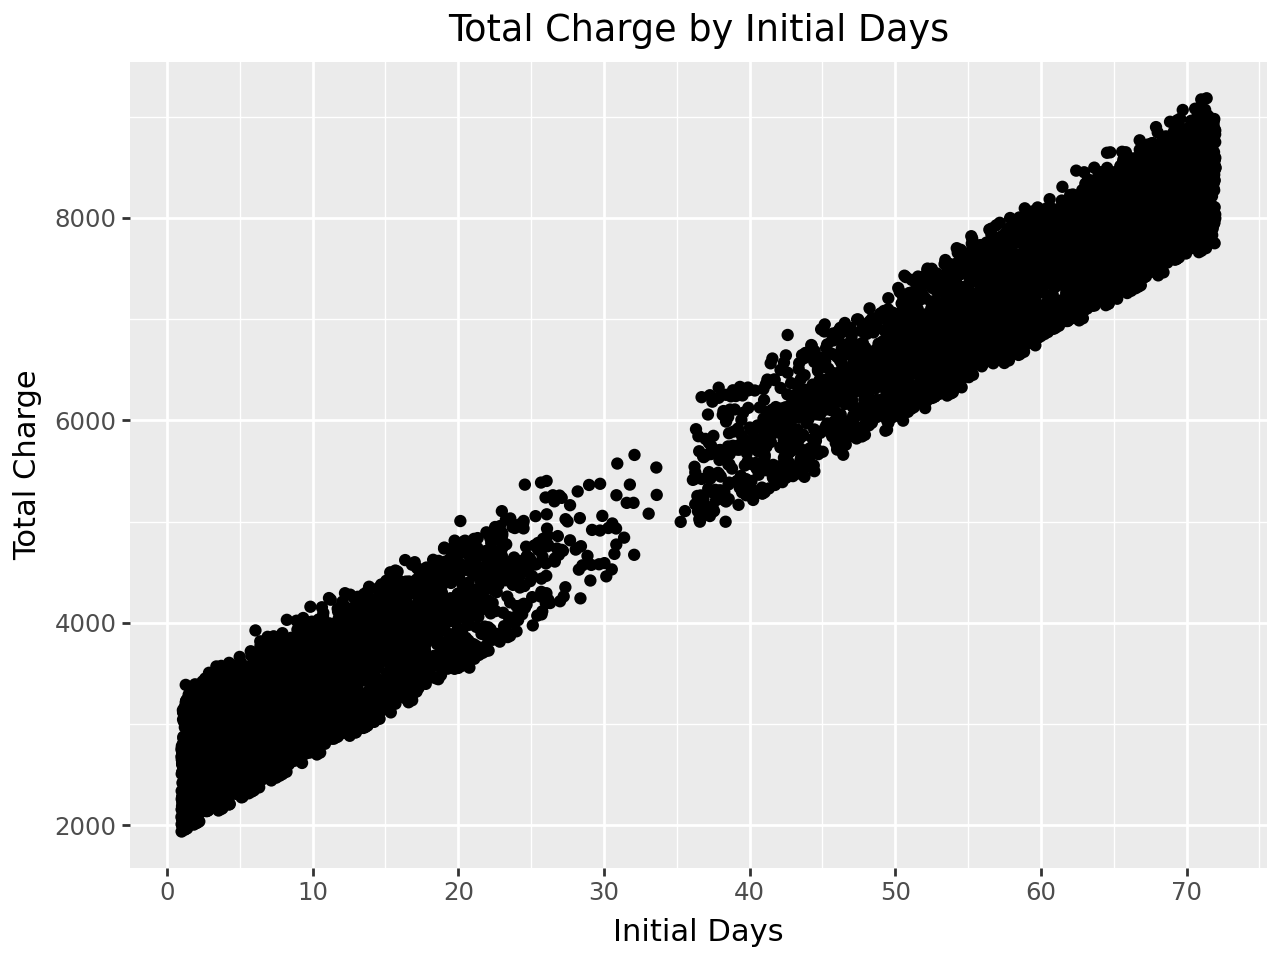

In [68]:
# initial days and total charge
plot=(ggplot(medical) 
      + aes(x="Initial_days", y="TotalCharge") 
      + labs(title="Total Charge by Initial Days", x="Initial Days", y="Total Charge") 
      + geom_point()
      + scale_x_continuous(breaks=range(0,80,10)))
plot.show()

Start initial regression model and check VIF

In [69]:
# Select independent variables
X = medical[['Children', 'Age', 'Income', 'VitD_levels','Soft_drink_numeric','Diabetes_numeric','Stroke_numeric',
             'Complication_risk_numeric','Overweight_numeric','Initial_days','Emergency_numeric','Elective_numeric',
             'CTScan_numeric','Intravenous_numeric','MRI_numeric']]

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Print the VIF results
print(vif)

    VIF Factor                   features
0     1.930998                   Children
1     7.267361                        Age
2     2.939636                     Income
3    17.708646                VitD_levels
4     1.345339         Soft_drink_numeric
5     1.371026           Diabetes_numeric
6     1.247810             Stroke_numeric
7     3.295713  Complication_risk_numeric
8     3.359927         Overweight_numeric
9     2.670547               Initial_days
10    3.015662          Emergency_numeric
11    1.990692           Elective_numeric
12    1.231763             CTScan_numeric
13    1.584851        Intravenous_numeric
14    1.071555                MRI_numeric


In [70]:
#remove VitD levels due to high VIF (multicollinearity)
# this is the initial model
x = medical[['Children', 'Age', 'Income','Soft_drink_numeric','Diabetes_numeric','Stroke_numeric',
             'Complication_risk_numeric','Overweight_numeric','Initial_days','Emergency_numeric','Elective_numeric',
             'CTScan_numeric','Intravenous_numeric','MRI_numeric']]
y = medical['TotalCharge']

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
initial_model = model.summary()
print(initial_model)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.570e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:12:07   Log-Likelihood:                -64068.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9985   BIC:                         1.283e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [71]:
# Begin backward stepwise elimination for reduced model development
# removed soft drink numeric -- least significant
x = medical[['Children', 'Age', 'Income','Diabetes_numeric','Stroke_numeric',
             'Complication_risk_numeric','Overweight_numeric','Initial_days','Emergency_numeric','Elective_numeric',
             'CTScan_numeric','Intravenous_numeric','MRI_numeric']]
y = medical['TotalCharge']

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
reduced_model = model.summary()
print(reduced_model)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.691e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:12:21   Log-Likelihood:                -64068.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9986   BIC:                         1.283e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [72]:
# removed Children -- least significant
x = medical[['Age', 'Income','Diabetes_numeric','Stroke_numeric',
             'Complication_risk_numeric','Overweight_numeric','Initial_days','Emergency_numeric','Elective_numeric',
             'CTScan_numeric','Intravenous_numeric','MRI_numeric']]
y = medical['TotalCharge']

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
reduced_model = model.summary()
print(reduced_model)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.832e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:12:27   Log-Likelihood:                -64068.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9987   BIC:                         1.283e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [73]:
# removed overweight numeric -- least significant
x = medical[['Age', 'Income','Diabetes_numeric','Stroke_numeric',
             'Complication_risk_numeric','Initial_days','Emergency_numeric','Elective_numeric',
             'CTScan_numeric','Intravenous_numeric','MRI_numeric']]
y = medical['TotalCharge']

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
reduced_model = model.summary()
print(reduced_model)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.999e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:12:32   Log-Likelihood:                -64068.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9988   BIC:                         1.282e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [74]:
# removed CT scan numeric -- least significant
x = medical[['Age', 'Income','Diabetes_numeric','Stroke_numeric',
             'Complication_risk_numeric','Initial_days','Emergency_numeric','Elective_numeric',
             'Intravenous_numeric','MRI_numeric']]
y = medical['TotalCharge']

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
reduced_model = model.summary()
print(reduced_model)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.199e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:12:37   Log-Likelihood:                -64068.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9989   BIC:                         1.282e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [75]:
# removed intravenous numeric -- least significant
x = medical[['Age', 'Income','Diabetes_numeric','Stroke_numeric',
             'Complication_risk_numeric','Initial_days','Emergency_numeric','Elective_numeric',
             'MRI_numeric']]
y = medical['TotalCharge']

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
reduced_model = model.summary()
print(reduced_model)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.443e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:12:43   Log-Likelihood:                -64069.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9990   BIC:                         1.282e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [76]:
# removed MRI numeric -- least significant
x = medical[['Age', 'Income','Diabetes_numeric','Stroke_numeric',
             'Complication_risk_numeric','Initial_days','Emergency_numeric','Elective_numeric']]
y = medical['TotalCharge']

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
reduced_model = model.summary()
print(reduced_model)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.748e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:12:47   Log-Likelihood:                -64069.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9991   BIC:                         1.282e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [77]:
# removed stroke numeric -- least significant
x = medical[['Age', 'Income','Diabetes_numeric',
             'Complication_risk_numeric','Initial_days','Emergency_numeric','Elective_numeric']]
y = medical['TotalCharge']

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
reduced_model = model.summary()
print(reduced_model)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.141e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:12:51   Log-Likelihood:                -64070.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9992   BIC:                         1.282e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [78]:
# removed income -- least significant
x = medical[['Age','Diabetes_numeric', 'Complication_risk_numeric','Initial_days','Emergency_numeric','Elective_numeric']]
y = medical['TotalCharge']

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
reduced_model = model.summary()
print(reduced_model)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.664e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:12:56   Log-Likelihood:                -64071.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9993   BIC:                         1.282e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [79]:
# removed elective numeric -- least significant
x = medical[['Age','Diabetes_numeric', 'Complication_risk_numeric','Initial_days','Emergency_numeric']]
y = medical['TotalCharge']

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
reduced_model = model.summary()
print(reduced_model)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.397e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:12:59   Log-Likelihood:                -64072.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9994   BIC:                         1.282e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [80]:
# removed age -- least significant
# this is final reduced model
x = medical[['Diabetes_numeric', 'Complication_risk_numeric','Initial_days','Emergency_numeric']]
y = medical['TotalCharge']

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
final_reduced_model = model.summary()
print(final_reduced_model)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.495e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:13:04   Log-Likelihood:                -64073.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9995   BIC:                         1.282e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

BIC values (initial = 1.283e+05, reduced = 1.282e+05) are slightly lower in the reduced/final model which shows better fit. F statistic much higher in reduced model (5.495e+05 vs 1.465e+05)

Make Residual Plot

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.495e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:14:47   Log-Likelihood:                -64073.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9995   BIC:                         1.282e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

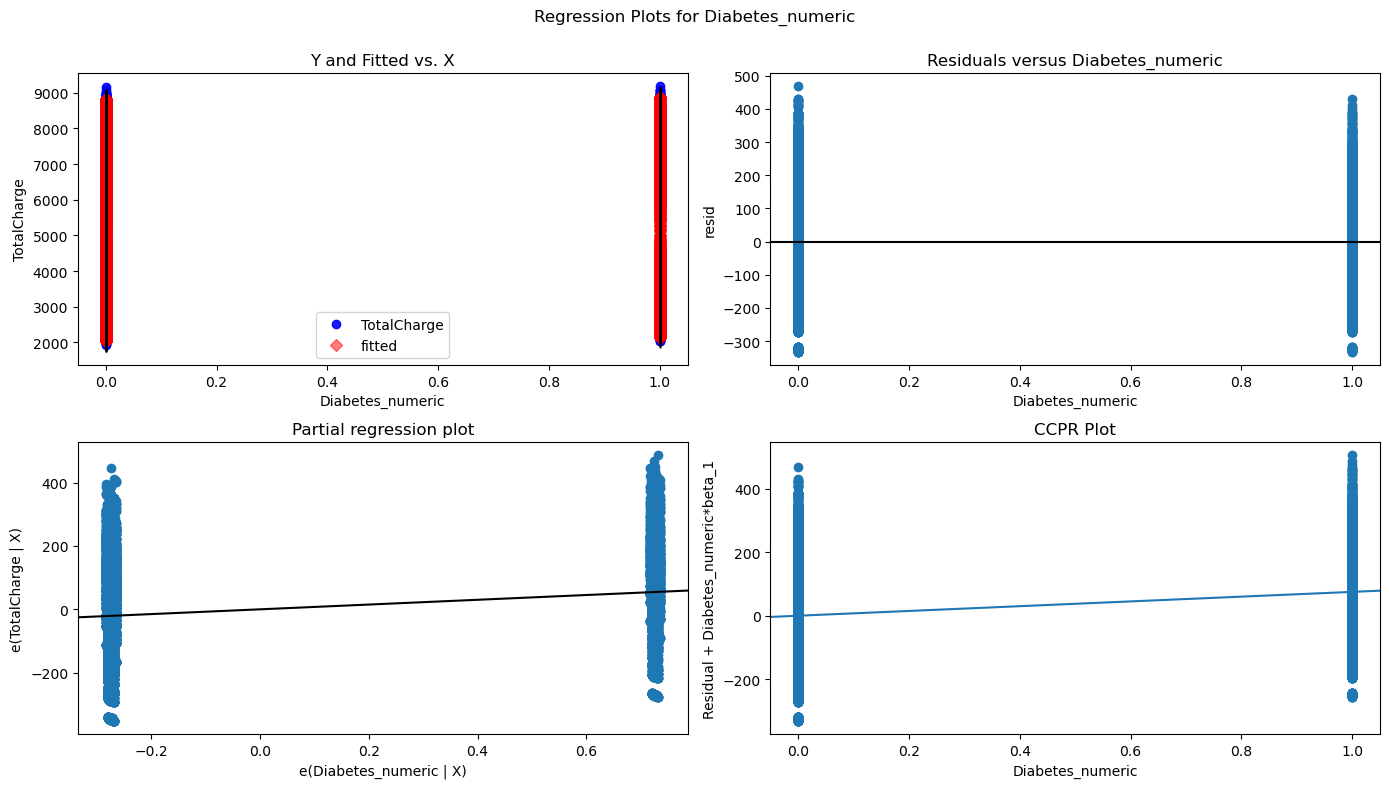

In [81]:
# residual plot for Diabetes numeric
reg_model = ols('TotalCharge ~ Diabetes_numeric + Complication_risk_numeric + Initial_days + Emergency_numeric', 
                  data=medical).fit() 
  
print(reg_model.summary()) 
  
diabetes_residuals = plt.figure(figsize=(14, 8)) 
  
diabetes_residuals = sm.graphics.plot_regress_exog(reg_model, 'Diabetes_numeric', fig=diabetes_residuals) 

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.495e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:14:54   Log-Likelihood:                -64073.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9995   BIC:                         1.282e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

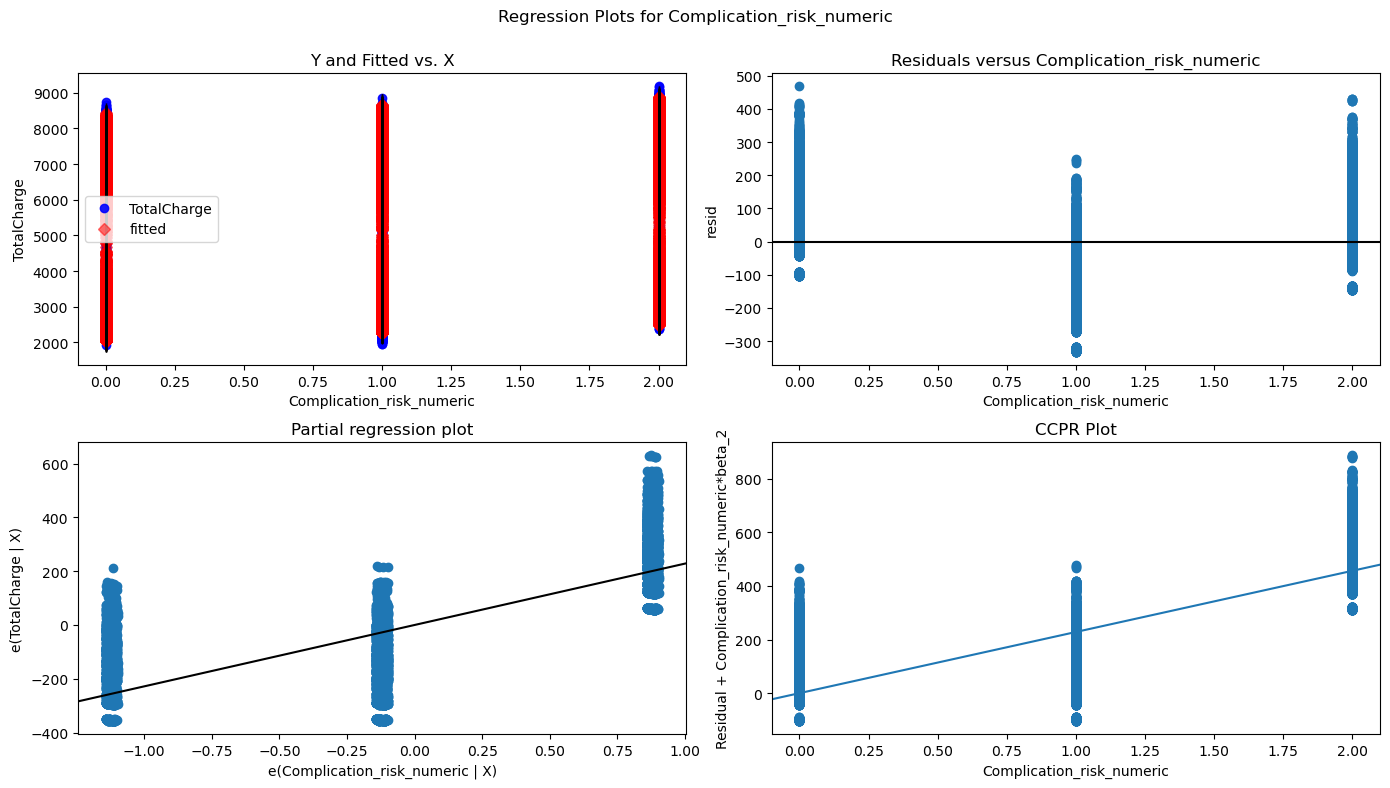

In [82]:
# residual plot for complication risk numeric
reg_model = ols('TotalCharge ~ Diabetes_numeric + Complication_risk_numeric + Initial_days + Emergency_numeric', 
                  data=medical).fit() 
  
print(reg_model.summary()) 
  
complication_residuals = plt.figure(figsize=(14, 8)) 
  
complication_residuals = sm.graphics.plot_regress_exog(reg_model, 'Complication_risk_numeric', fig=complication_residuals) 

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.495e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:15:00   Log-Likelihood:                -64073.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9995   BIC:                         1.282e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

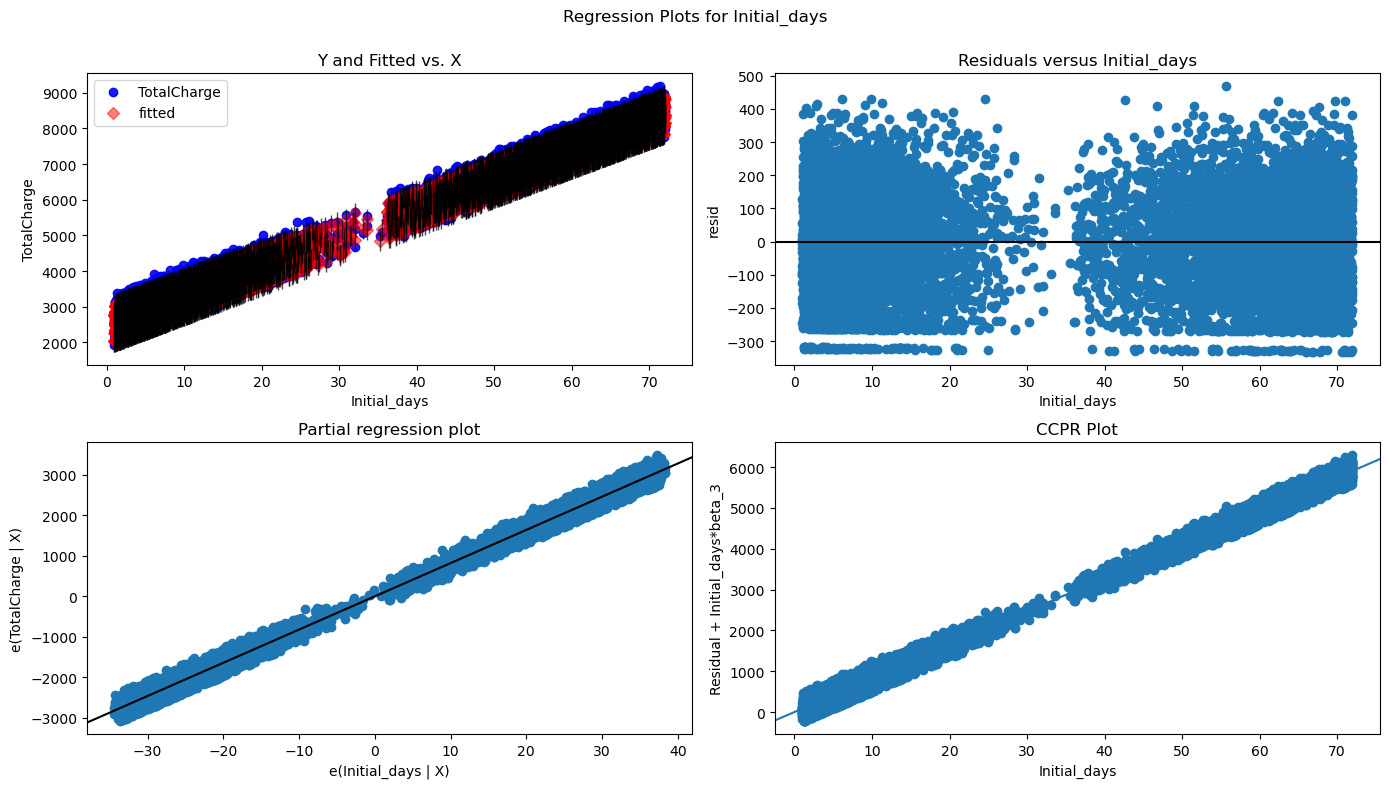

In [83]:
# residual plot for initial days
reg_model = ols('TotalCharge ~ Diabetes_numeric + Complication_risk_numeric + Initial_days + Emergency_numeric', 
                  data=medical).fit() 
  
print(reg_model.summary()) 
  
initialdays_residuals = plt.figure(figsize=(14, 8)) 
  
initialdays_residuals = sm.graphics.plot_regress_exog(reg_model, 'Initial_days', fig=initialdays_residuals) 

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.495e+05
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:15:08   Log-Likelihood:                -64073.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9995   BIC:                         1.282e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

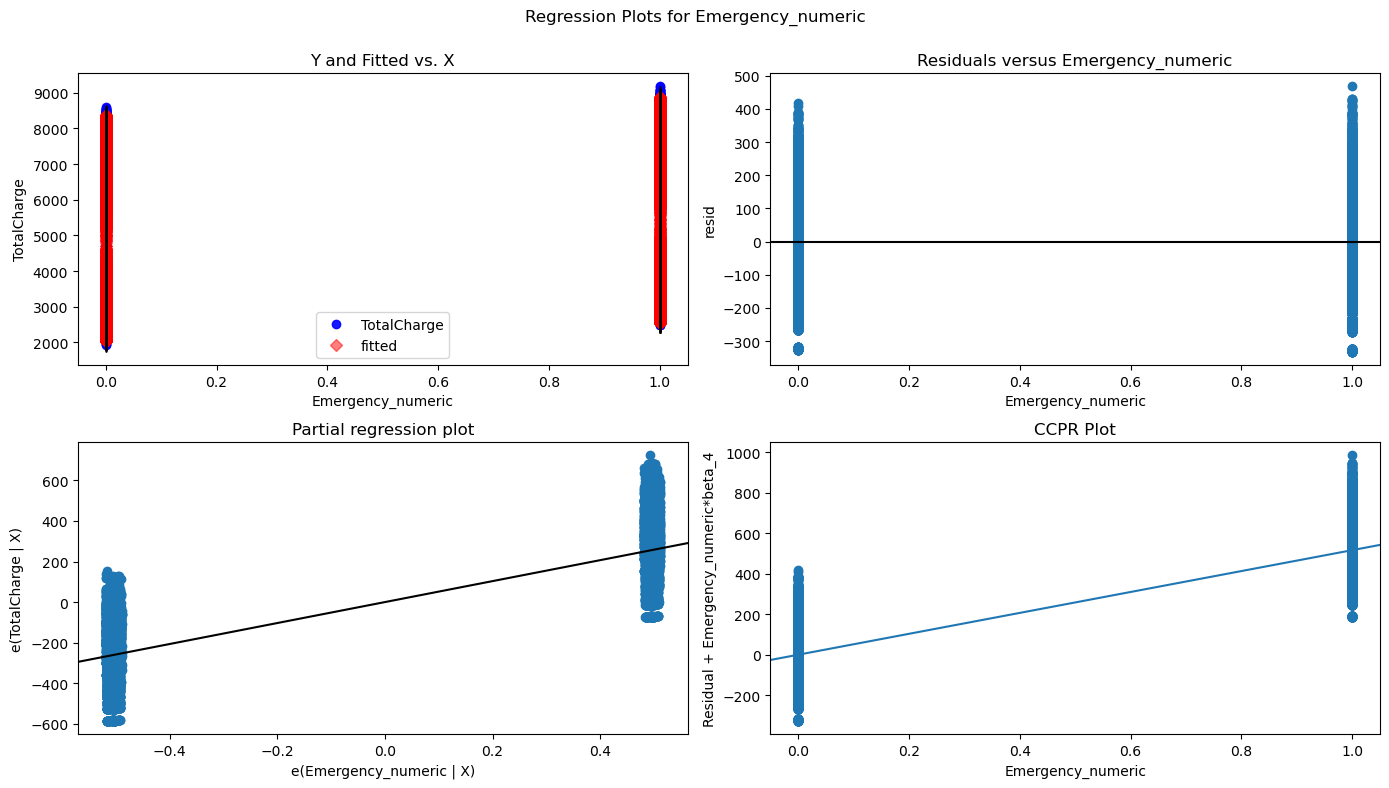

In [84]:
# residual plot for emergency numeric 
reg_model = ols('TotalCharge ~ Diabetes_numeric + Complication_risk_numeric + Initial_days + Emergency_numeric', 
                  data=medical).fit() 
  
print(reg_model.summary()) 
   
emergency_residuals = plt.figure(figsize=(14, 8)) 
  
emergency_residuals = sm.graphics.plot_regress_exog(reg_model, 'Emergency_numeric', fig=emergency_residuals) 

In [85]:
# get residual std error of residuals
reg_model = ols('TotalCharge ~ Diabetes_numeric + Complication_risk_numeric + Initial_days + Emergency_numeric', 
                  data=medical).fit() 
model = sm.OLS(y, X).fit()

print(np.sqrt(model.mse_resid))

243.91510043034756


In [86]:
# saving the dataframe 'medical' as a CSV file 
medical.to_csv('medical_prepared.csv', index = True)